# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as sts

# Import API key
from api_keys import weather_api_key as api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
import time 

In [4]:
# Tutor's help...

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
# List of city data
city_data = []

#Print to logger
print("Beginning data retrieval        ")
print("--------------------------------")

# Create counter
record_count = 1
set_count = 1 

# Loop through all cities in list
for i, city in enumerate(cities):
    
    # Group cities in groups of 50
    if (i %50==0 and i!=0):
        set_count += 1 
        record_count = 0
        time.sleep(3)
    # Create endpoint for each city
    city_url = url+'&q='+city
    print('Processing Record %s of Set %s | %s' % (record_count, set_count, city))
    
    record_count += 1 
    
    # Run API request for each city
    response = requests.get(city_url)
    results = response.json()
    
    try:
        city_lat = results['coord']['lat']
        city_lng = results['coord']['lon']
        city_max_temp = results['main']['temp_max']
        city_humidity = results['main']['humidity']
        city_clouds = results['clouds']['all']
        city_wind = results['wind']['speed']
        city_country = results['sys']['country']
        city_date = results['dt']

        # Append city info into city_data list
        city_data.append({'City Name': city,
                          'Lat': city_lat,
                          'Lng': city_lng,
                         'Max Temp': city_max_temp,
                         'Humidity': city_humidity,
                         'Clouds': city_clouds,
                         'Wind': city_wind,
                         'Country': city_country,
                         'Date': city_date})


    except KeyError as e:
        print('City Not Found. Skipping......')
        pass 
    
print("--------------------------------")
print('Data Retrieval Complete         ')
print("--------------------------------")


Beginning data retrieval        
--------------------------------
Processing Record 1 of Set 1 | freeport
Processing Record 2 of Set 1 | kumla
Processing Record 3 of Set 1 | cururupu
Processing Record 4 of Set 1 | vardo
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | itoman
Processing Record 7 of Set 1 | esperance
Processing Record 8 of Set 1 | east london
Processing Record 9 of Set 1 | ust-kamchatsk
City Not Found. Skipping......
Processing Record 10 of Set 1 | pangnirtung
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | chokurdakh
Processing Record 13 of Set 1 | berlevag
Processing Record 14 of Set 1 | noumea
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | torbay
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | souillac
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1 | vaini
Processing Record

Processing Record 37 of Set 4 | gravdal
Processing Record 38 of Set 4 | mahebourg
Processing Record 39 of Set 4 | amapa
Processing Record 40 of Set 4 | san cristobal
Processing Record 41 of Set 4 | itapora
Processing Record 42 of Set 4 | san andres
Processing Record 43 of Set 4 | clyde river
Processing Record 44 of Set 4 | palabuhanratu
City Not Found. Skipping......
Processing Record 45 of Set 4 | belaya gora
Processing Record 46 of Set 4 | tezu
Processing Record 47 of Set 4 | bahar
Processing Record 48 of Set 4 | mahajanga
Processing Record 49 of Set 4 | nizwa
Processing Record 0 of Set 5 | puerto madryn
Processing Record 1 of Set 5 | asau
Processing Record 2 of Set 5 | phan rang
City Not Found. Skipping......
Processing Record 3 of Set 5 | osorno
Processing Record 4 of Set 5 | kavaratti
Processing Record 5 of Set 5 | jaru
Processing Record 6 of Set 5 | port keats
Processing Record 7 of Set 5 | sukhoverkovo
City Not Found. Skipping......
Processing Record 8 of Set 5 | tawzar
City Not

Processing Record 21 of Set 8 | vysokogornyy
Processing Record 22 of Set 8 | san antonio
Processing Record 23 of Set 8 | vestmannaeyjar
Processing Record 24 of Set 8 | manta
Processing Record 25 of Set 8 | tura
Processing Record 26 of Set 8 | noyabrsk
Processing Record 27 of Set 8 | santa cruz
Processing Record 28 of Set 8 | taburi
City Not Found. Skipping......
Processing Record 29 of Set 8 | vung tau
Processing Record 30 of Set 8 | whitehorse
Processing Record 31 of Set 8 | stokmarknes
Processing Record 32 of Set 8 | bentonville
Processing Record 33 of Set 8 | iqaluit
Processing Record 34 of Set 8 | agar
Processing Record 35 of Set 8 | mandan
Processing Record 36 of Set 8 | lavumisa
Processing Record 37 of Set 8 | baykit
Processing Record 38 of Set 8 | khorixas
Processing Record 39 of Set 8 | naze
Processing Record 40 of Set 8 | thinadhoo
Processing Record 41 of Set 8 | tumannyy
City Not Found. Skipping......
Processing Record 42 of Set 8 | golfito
Processing Record 43 of Set 8 | mot

Processing Record 5 of Set 12 | vila franca do campo
Processing Record 6 of Set 12 | anadyr
Processing Record 7 of Set 12 | cap malheureux
Processing Record 8 of Set 12 | honningsvag
Processing Record 9 of Set 12 | rapid city
Processing Record 10 of Set 12 | tomatlan
Processing Record 11 of Set 12 | santa maria
Processing Record 12 of Set 12 | puro
Processing Record 13 of Set 12 | susanville
Processing Record 14 of Set 12 | harper
Processing Record 15 of Set 12 | la rioja
Processing Record 16 of Set 12 | jiayuguan
Processing Record 17 of Set 12 | umm lajj
Processing Record 18 of Set 12 | cabedelo
Processing Record 19 of Set 12 | silver city
Processing Record 20 of Set 12 | gladstone
Processing Record 21 of Set 12 | luderitz
Processing Record 22 of Set 12 | acarau
Processing Record 23 of Set 12 | boffa
Processing Record 24 of Set 12 | khandyga
Processing Record 25 of Set 12 | goderich
Processing Record 26 of Set 12 | muroto
Processing Record 27 of Set 12 | miles city
Processing Record 2

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data_df = pd.DataFrame(city_data) 
city_data_df.to_csv('city_data_df.csv', index=False, header=True)
city_data_df
              

,City Name,Lat,Lng,Max Temp,Humidity,Clouds,Wind,Country,Date
0,freeport,40.6576,-73.5832,93.22,70,1,1.01,US,1628810692
1,kumla,59.1277,15.1434,58.33,88,20,5.75,SE,1628810700
2,cururupu,-1.8283,-44.8683,76.14,95,100,5.32,BR,1628810701
3,vardo,70.3705,31.1107,51.39,94,100,7.87,NO,1628810701
4,mataura,-46.1927,168.8643,50.49,89,17,2.98,NZ,1628810701
...,...,...,...,...,...,...,...,...,...
551,boyuibe,-20.4167,-63.2833,64.31,41,38,4.23,BO,1628810954
552,hit,33.6416,42.8251,94.55,21,0,10.69,IQ,1628810955
553,bilibino,68.0546,166.4372,64.06,44,100,4.56,RU,1628810955
554,buta,2.7858,24.7300,69.60,98,97,2.04,CD,1628810956


In [6]:
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Clouds,Wind,Date
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,5.560000e+02
mean,20.522352,18.426206,68.978705,71.501799,51.302158,7.628903,1.628811e+09
std,33.518811,90.603021,14.238530,20.748472,39.453867,5.406140,8.855832e+01
min,-54.800000,-175.200000,31.680000,10.000000,0.000000,0.000000,1.628810e+09
25%,-6.683575,-61.040150,57.907500,60.750000,8.000000,3.462500,1.628811e+09
50%,24.727300,24.244900,69.730000,77.000000,52.500000,6.630000,1.628811e+09
75%,47.954975,95.321600,79.622500,87.000000,92.250000,10.695000,1.628811e+09
max,78.218600,179.316700,107.170000,100.000000,100.000000,42.570000,1.628811e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

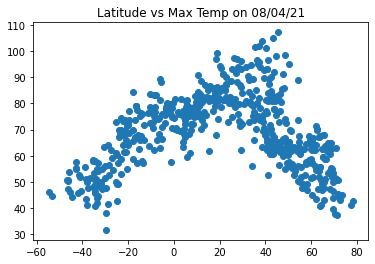

In [9]:
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])
plt.title('Latitude vs Max Temp on 08/04/21')
plt.show()

## Latitude vs. Humidity Plot

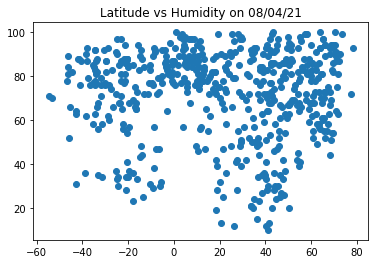

In [10]:
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])
plt.title('Latitude vs Humidity on 08/04/21')
plt.show()

## Latitude vs. Cloudiness Plot

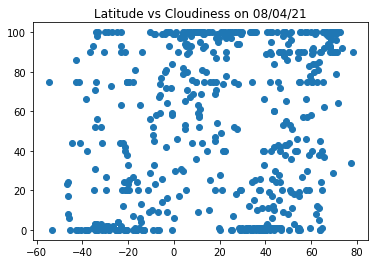

In [11]:
plt.scatter(city_data_df['Lat'], city_data_df['Clouds'])
plt.title('Latitude vs Cloudiness on 08/04/21')
plt.show()

## Latitude vs. Wind Speed Plot

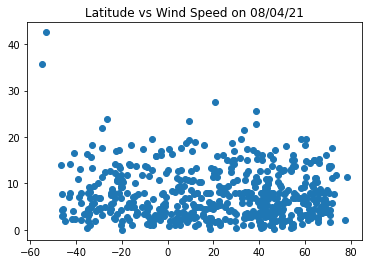

In [12]:
plt.scatter(city_data_df['Lat'], city_data_df['Wind'])
plt.title('Latitude vs Wind Speed on 08/04/21')
plt.show()

## Linear Regression

In [13]:
north = city_data_df['Lat']>0
south = city_data_df['Lat']<0
north_hemi = city_data_df.loc[north]
south_hemi = city_data_df.loc[south]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

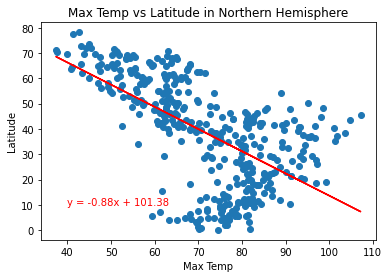

In [16]:
x_values = north_hemi['Max Temp']
y_values = north_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=10,color="red")
plt.title('Max Temp vs Latitude in Northern Hemisphere')
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.savefig('Max Temp vs Latitude in Northern Hemisphere 080621')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

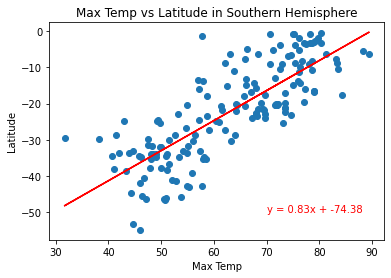

In [17]:
x_values = south_hemi['Max Temp']
y_values = south_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(70,-50),fontsize=10,color="red")
plt.title('Max Temp vs Latitude in Southern Hemisphere')
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.savefig('Max Temp vs Latitude in Southern Hemisphere 080621')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

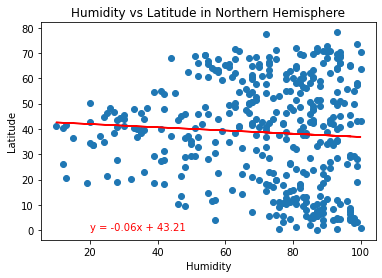

In [18]:
x_values = north_hemi['Humidity']
y_values = north_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,0),fontsize=10,color="red")
plt.title('Humidity vs Latitude in Northern Hemisphere')
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.savefig('Humidity vs Latitude in Northern Hemisphere 080621')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

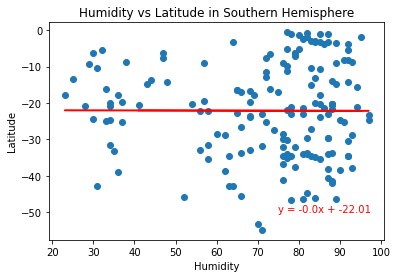

In [19]:
x_values = south_hemi['Humidity']
y_values = south_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(75,-50),fontsize=10,color="red")
plt.title('Humidity vs Latitude in Southern Hemisphere')
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.savefig('Humidity vs Latitude in Southern Hemisphere 080621')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

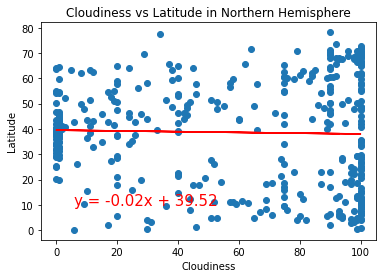

In [20]:
x_values = north_hemi['Clouds']
y_values = north_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Cloudiness vs Latitude in Northern Hemisphere')
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.savefig('Cloudiness vs Latitude in Northern Hemisphere 080621')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

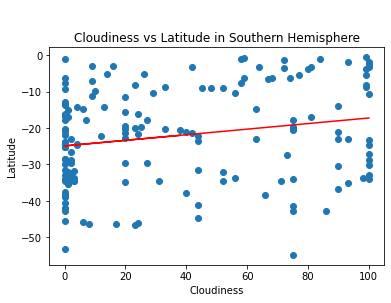

In [21]:
x_values = south_hemi['Clouds']
y_values = south_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Cloudiness vs Latitude in Southern Hemisphere')
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.savefig('Cloudiness vs Latitude in Southern Hemisphere 080621')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

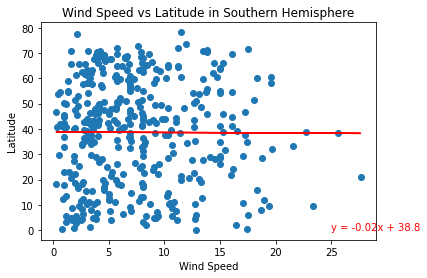

In [22]:
x_values = north_hemi['Wind']
y_values = north_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,0),fontsize=10,color="red")
plt.title('Wind Speed vs Latitude in Southern Hemisphere')
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.savefig('Wind Speed vs Latitude in Northern Hemisphere 080621')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

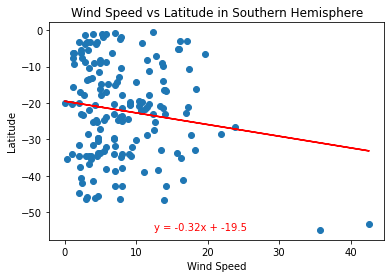

In [23]:
x_values = south_hemi['Wind']
y_values = south_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(12.5,-55),fontsize=10,color="red")
plt.title('Wind Speed vs Latitude in Southern Hemisphere')
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.savefig('Wind Speed vs Latitude in Southern Hemisphere 080621')
plt.show()